## 1. tree
## 2. rpart
## 3. party

In [3]:
install.packages(c('rpart', 'survival'))

package 'rpart' successfully unpacked and MD5 sums checked
package 'survival' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\15U560\AppData\Local\Temp\RtmpukQlAq\downloaded_packages


In [5]:
install.packages('party')

Warning message:
"package 'party' is in use and will not be installed"

In [1]:
library(rpart)
library(party)
library(caret)

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Loading required package: lattice
Loading required package: ggplot2


In [4]:
set.seed(123)
N <- nrow(iris)
tr.idx <- sample(1:N, N*2/3)
train <- iris[tr.idx, ]
test <- iris[-tr.idx, ]

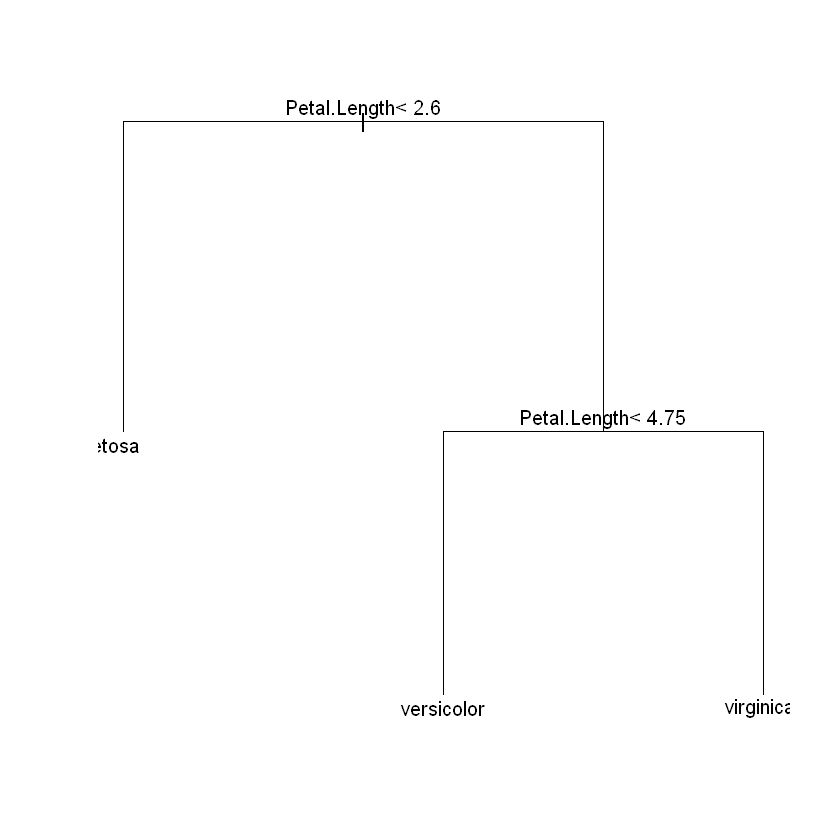

In [5]:
cl1 <- rpart(Species ~., train)
plot(cl1)
text(cl1, cex=1)

### repart 함수는 가지치기를 해서 나온 결과
    * 데이터에 따라 부가적인 가지치기가 필요할 수도 있음
    * tree패키지에서 pruning한 결과와 동일

### repart 패키지는 과적합의 우려가 있으므로 pruning을 해줘야 함

In [6]:
printcp(cl1)


Classification tree:
rpart(formula = Species ~ ., data = train)

Variables actually used in tree construction:
[1] Petal.Length

Root node error: 64/100 = 0.64

n= 100 

       CP nsplit rel error   xerror     xstd
1 0.51562      0  1.000000 1.125000 0.070156
2 0.43750      1  0.484375 0.578125 0.075438
3 0.01000      2  0.046875 0.078125 0.034054


### xerror(cross validation error)가 최소가 되는 node의 값을 정함
### nsplit(number of split) --> 2번째 split까지 사용하는게 최적이다.

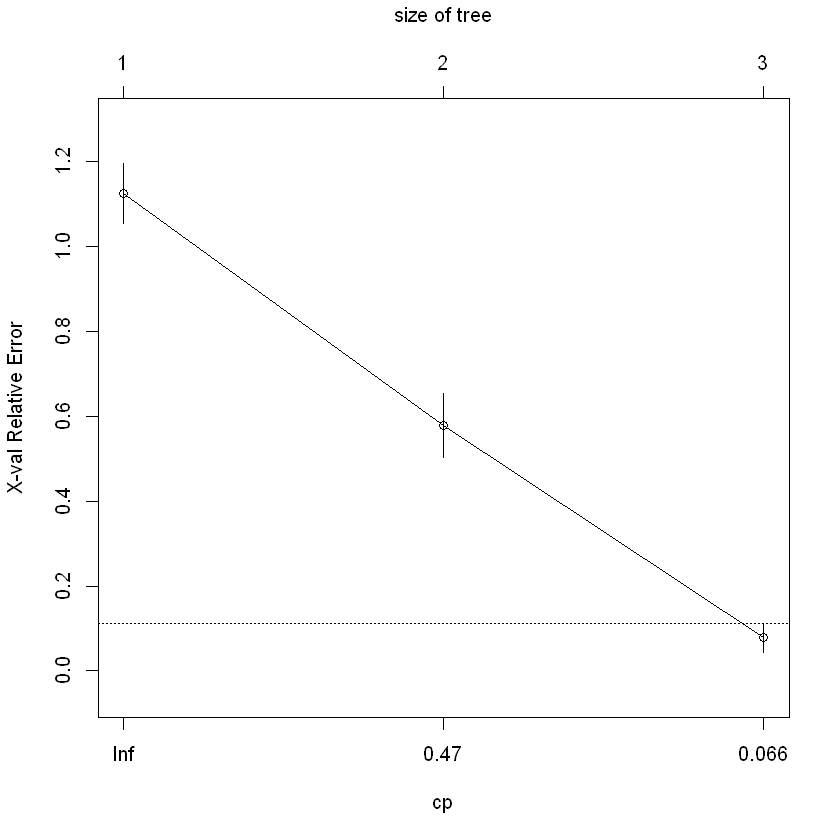

In [7]:
plotcp(cl1)

## rpart를 사용한 최종 tree 모형 

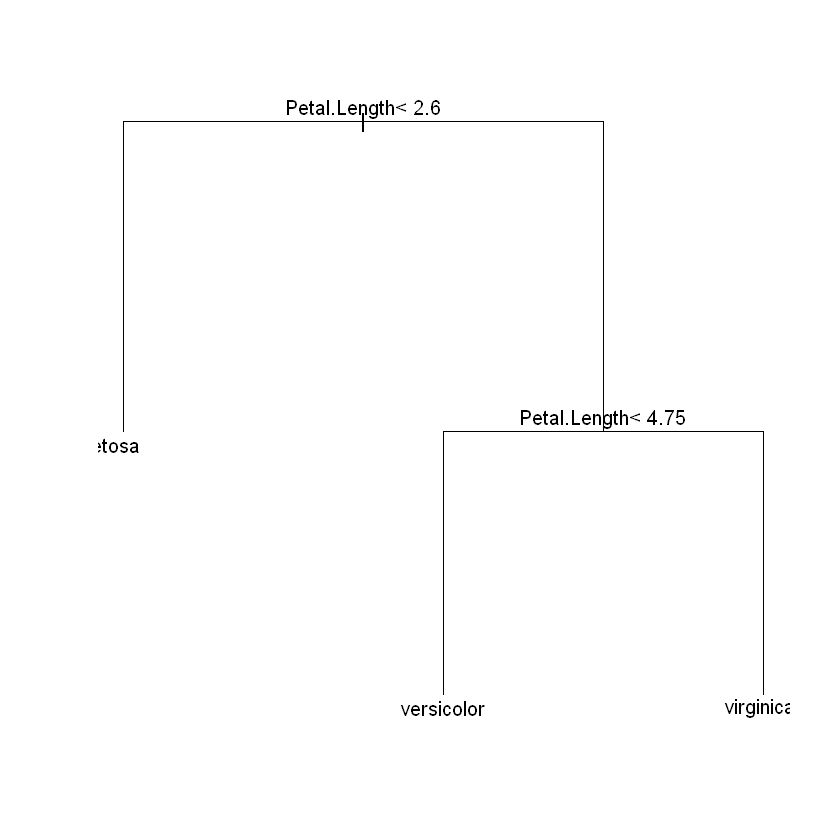

In [12]:
pcl1 <- prune(cl1, cp=cl1$cptable[which.min(cl1$cptable[,'xerror']), 'CP'])
plot(pcl1)
text(pcl1)

In [13]:
pred2 <- predict(cl1, test, type='class')
confusionMatrix(pred2, test$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         14          0         0
  versicolor      0         16         1
  virginica       0          3        16

Overall Statistics
                                          
               Accuracy : 0.92            
                 95% CI : (0.8077, 0.9778)
    No Information Rate : 0.38            
    P-Value [Acc > NIR] : 1.678e-15       
                                          
                  Kappa : 0.8794          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                   1.00            0.8421           0.9412
Specificity                   1.00            0.9677           0.9091
Pos Pred Value                1.00            0.9412           0.8421
Neg Pred Value                1.00            0.9091           0.9677
Prevalence                    0.28          

### iris데이터는 방법론 별로 변동성이 적다. 조금 복잡한 데이터를 가지고 하면 방법마다 다른걸 알 수 있다.

### party 패키지 - ctree (의사결정나무 함수)

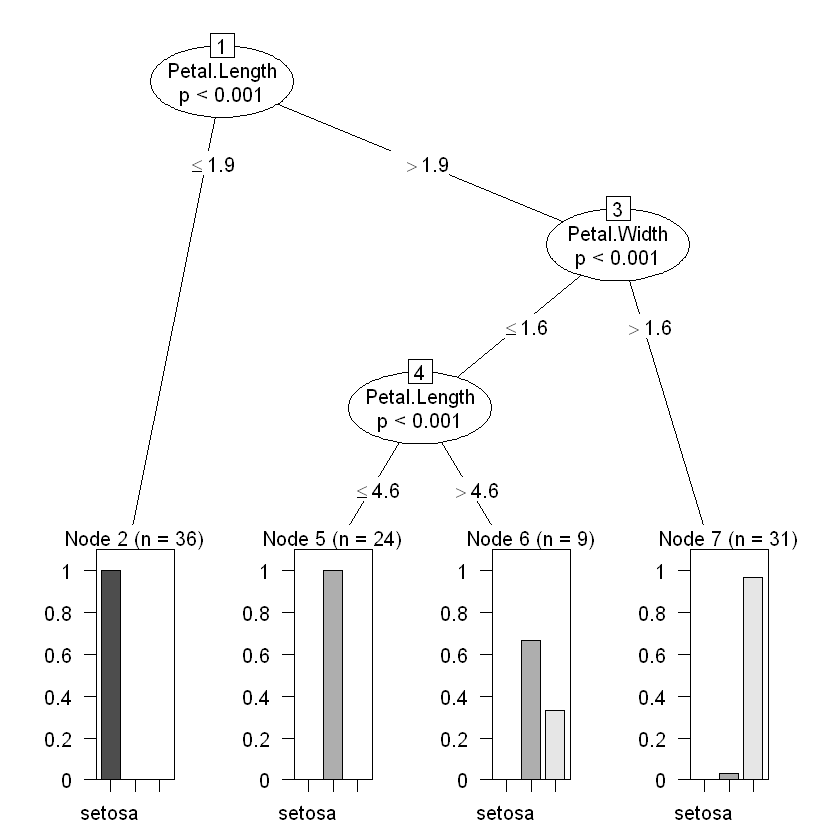

In [14]:
partymod <- ctree(Species ~., train)
plot(partymod)

In [15]:
partymod


	 Conditional inference tree with 4 terminal nodes

Response:  Species 
Inputs:  Sepal.Length, Sepal.Width, Petal.Length, Petal.Width 
Number of observations:  100 

1) Petal.Length <= 1.9; criterion = 1, statistic = 93.139
  2)*  weights = 36 
1) Petal.Length > 1.9
  3) Petal.Width <= 1.6; criterion = 1, statistic = 42.038
    4) Petal.Length <= 4.6; criterion = 0.999, statistic = 14.023
      5)*  weights = 24 
    4) Petal.Length > 4.6
      6)*  weights = 9 
  3) Petal.Width > 1.6
    7)*  weights = 31 

In [16]:
partypred <- predict(partymod, test)
confusionMatrix(partypred, test$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         14          0         0
  versicolor      0         18         1
  virginica       0          1        16

Overall Statistics
                                          
               Accuracy : 0.96            
                 95% CI : (0.8629, 0.9951)
    No Information Rate : 0.38            
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9395          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                   1.00            0.9474           0.9412
Specificity                   1.00            0.9677           0.9697
Pos Pred Value                1.00            0.9474           0.9412
Neg Pred Value                1.00            0.9677           0.9697
Prevalence                    0.28          